In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [6]:
TRAINING_DIR = 'dogbreeds/images/Images'

In [7]:
IMG_SIZE = 224
BATCH_SIZE = 64
CLASS_NUM = 120

# Training IDG
train_idg = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range=0.1, 
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2)

# Training Gen
train_gen = train_idg.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)

Found 16508 images belonging to 120 classes.


In [8]:
# Test IDG
test_idg = ImageDataGenerator(rescale=1./255)

# Test Gen
test_gen = train_idg.flow_from_directory(
        TRAINING_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True,
        class_mode='categorical',
        subset='validation'
)

Found 4072 images belonging to 120 classes.


Found 16508 images belonging to 120 classes.


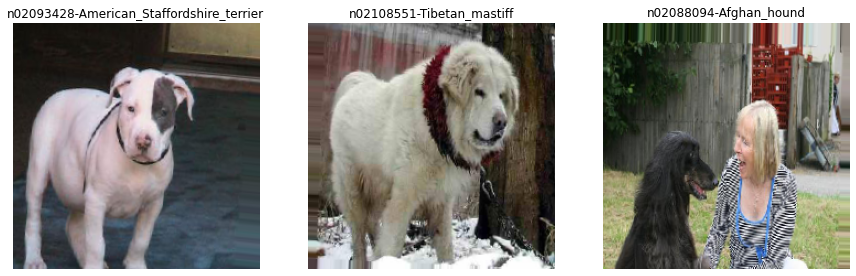

In [9]:
# Iterator
aug_iter = train_idg.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    subset='training'
)


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

def getLabel(index):
    return (list(aug_iter.class_indices.keys())[list(aug_iter.class_indices.values()).index(index)])

for i in range(3):
    
    obj = next(aug_iter)
    
    
    class_index = np.argmax(obj[1])
    
    
    image = obj[0]

    
    ax[i].imshow(image.reshape(IMG_SIZE, IMG_SIZE, 3))
    ax[i].set_title(getLabel(class_index))
    ax[i].axis('off')

In [10]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


base_model = keras.applications.InceptionV3(
    weights = 'imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

x = base_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(CLASS_NUM, activation='softmax')(x)


model = keras.Model(base_model.input, outputs)


for layer in base_model.layers:
    layer.trainable = False


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()

[0][0]     
__________________________________________________________________________________________________
mixed7 (Concatenate)            (None, 12, 12, 768)  0           activation_60[0][0]              
                                                                 activation_63[0][0]              
                                                                 activation_68[0][0]              
                                                                 activation_69[0][0]              
__________________________________________________________________________________________________
conv2d_72 (Conv2D)              (None, 12, 12, 192)  147456      mixed7[0][0]                     
__________________________________________________________________________________________________
batch_normalization_72 (BatchNo (None, 12, 12, 192)  576         conv2d_72[0][0]                  
_________________________________________________________________________________________________

In [11]:
history = model.fit(
    train_gen,
    steps_per_epoch=80,  
    epochs=2,
    verbose=1,
    validation_data=test_gen,
    validation_steps=50
)


Epoch 1/2
80/80 [==============================] - 317s 4s/step - loss: 2.9064 - accuracy: 0.4276 - val_loss: 3.8970 - val_accuracy: 0.5366
Epoch 2/2
80/80 [==============================] - 294s 4s/step - loss: 1.4848 - accuracy: 0.6634 - val_loss: 2.1632 - val_accuracy: 0.6609


In [29]:
from keras.preprocessing import image

#Predicting a given dog Breed 
img = ImageDataGenerator(rescale=1./255)
test_image=image.load_img( 'Downloads/dg.jpg',
        target_size=(224,224,3))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
test_image /= 255.0

result=model.predict(test_image)
y=np.argmax(result)
getLabel(y)

'n02102973-Irish_water_spaniel'